<a href="https://colab.research.google.com/github/AngelLinaStarshine/Books/blob/master/abalone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3945 - loss: 1.0871 - val_accuracy: 0.5251 - val_loss: 0.9422
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5212 - loss: 0.9469 - val_accuracy: 0.4907 - val_loss: 0.9625
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5262 - loss: 0.9026 - val_accuracy: 0.5448 - val_loss: 0.9140
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5286 - loss: 0.9140 - val_accuracy: 0.4993 - val_loss: 0.9361
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5233 - loss: 0.9187 - val_accuracy: 0.5481 - val_loss: 0.8648
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5081 - loss: 0.9215 - val_accuracy: 0.4921 - val_loss: 0.9392
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5216 - loss: 0.8970 - val_accuracy: 0.5443 - val_loss: 0.9365
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5004 - loss: 0.9284 - val_accuracy: 0.5433 - val_loss: 0

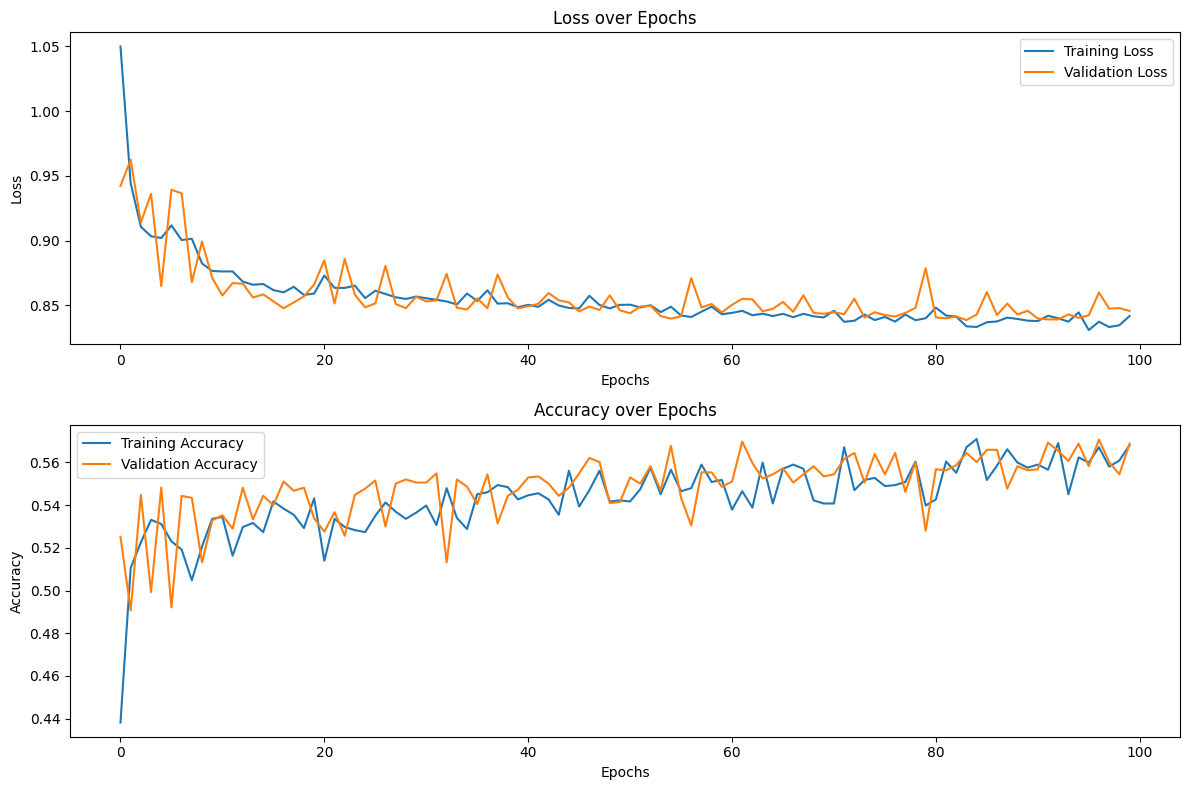

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

#https://www.researchgate.net/publication/337146276_Machine_Learning_Project_-_Predict_the_Age_of_Abalone
#https://realpython.com/knn-python/

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
                'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=column_names)

data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
X = data.drop('Sex', axis=1).values #features
y = data['Sex'].values #labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#https://stackoverflow.com/questions/46572674/keras-sequential-model-input-layer
#https://stackoverflow.com/questions/60472754/keras-learningratescheduler-callback-on-batches-instead-of-epochs

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
#https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

plt.figure(figsize=(12, 8))
#https://stackoverflow.com/questions/63483337/how-can-i-plot-training-accuracy-training-loss-with-respect-to-epochs-in-tensor

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.savefig('abalone-b.png')
plt.show()


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3882 - loss: 1.5096 - val_accuracy: 0.3662 - val_loss: 1.1784 - learning_rate: 0.0010
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5254 - loss: 1.0083 - val_accuracy: 0.4653 - val_loss: 1.0111 - learning_rate: 9.0484e-04
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4924 - loss: 0.9958 - val_accuracy: 0.5266 - val_loss: 0.9196 - learning_rate: 7.4082e-04
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5213 - loss: 0.9492 - val_accuracy: 0.5424 - val_loss: 0.8924 - learning_rate: 5.4881e-04
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4985 - loss: 0.9755 - val_accuracy: 0.5428 - val_loss: 0.8813 - learning_rate: 3.6788e-04
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4934 - loss: 0.9502 - val_accuracy: 0.5409 - val_loss: 0.8805 - learning_rate: 2.2313e-04
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4932 - lo

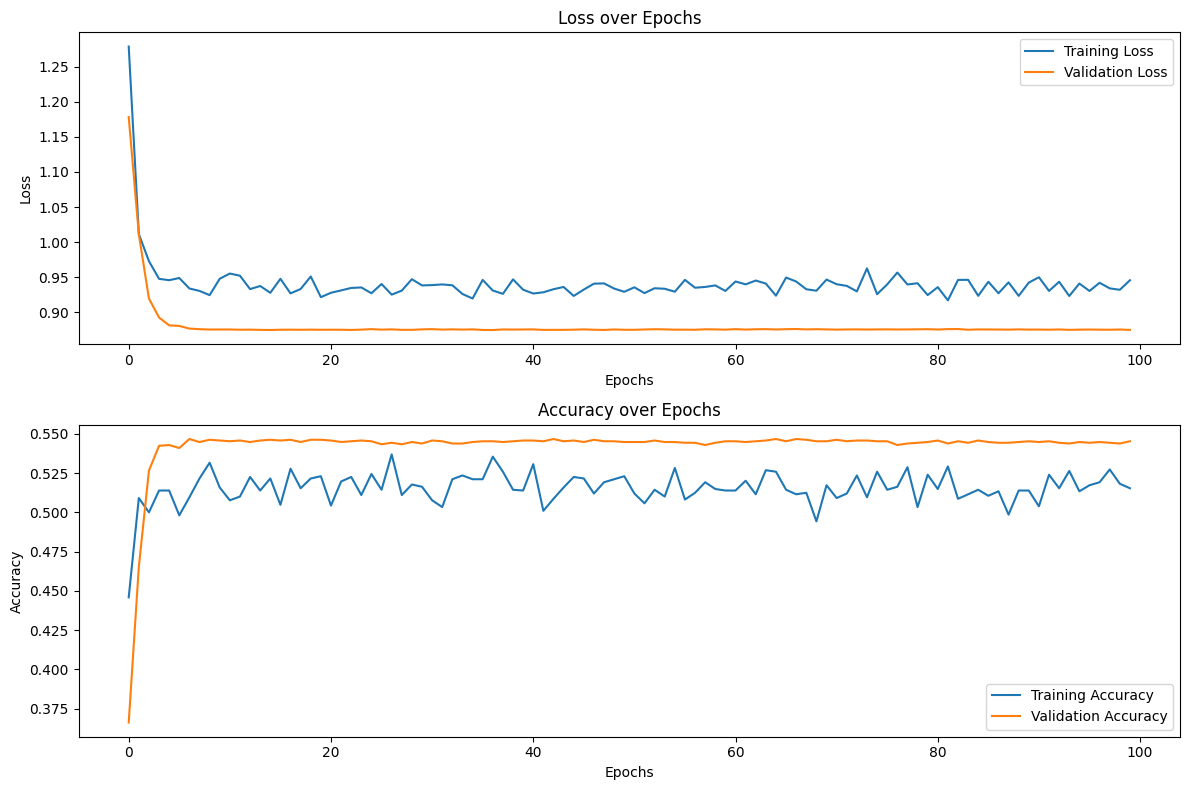

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
                'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=column_names)

data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
X = data.drop('Sex', axis=1).values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

#https://keras.io/api/models/sequential/
#https://keras.io/guides/sequential_model/
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

#https://discuss.pytorch.org/t/output-evaluation-loss-after-every-n-batches-instead-of-epochs-with-pytorch/116619

def scheduler(epoch, lr):
    return lr * np.exp(-0.1 * epoch)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(scheduler)

history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded), callbacks=[lr_scheduler])

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('abalone-c.png')
plt.show()


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4734 - loss: 1.1450 - val_accuracy: 0.3365 - val_loss: 1.2648 - learning_rate: 0.0010
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5134 - loss: 0.9570 - val_accuracy: 0.4643 - val_loss: 0.9716 - learning_rate: 9.0484e-04
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5071 - loss: 0.9434 - val_accuracy: 0.5361 - val_loss: 0.9013 - learning_rate: 7.4082e-04
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5172 - loss: 0.9345 - val_accuracy: 0.5419 - val_loss: 0.8715 - learning_rate: 5.4881e-04
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5357 - loss: 0.9211 - val_accuracy: 0.5438 - val_loss: 0.8631 - learning_rate: 3.6788e-04
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5219 - loss: 0.9070 - val_accuracy: 0.5462 - val_loss: 0.8589 - learning_rate: 2.2313e-04
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4999 - l

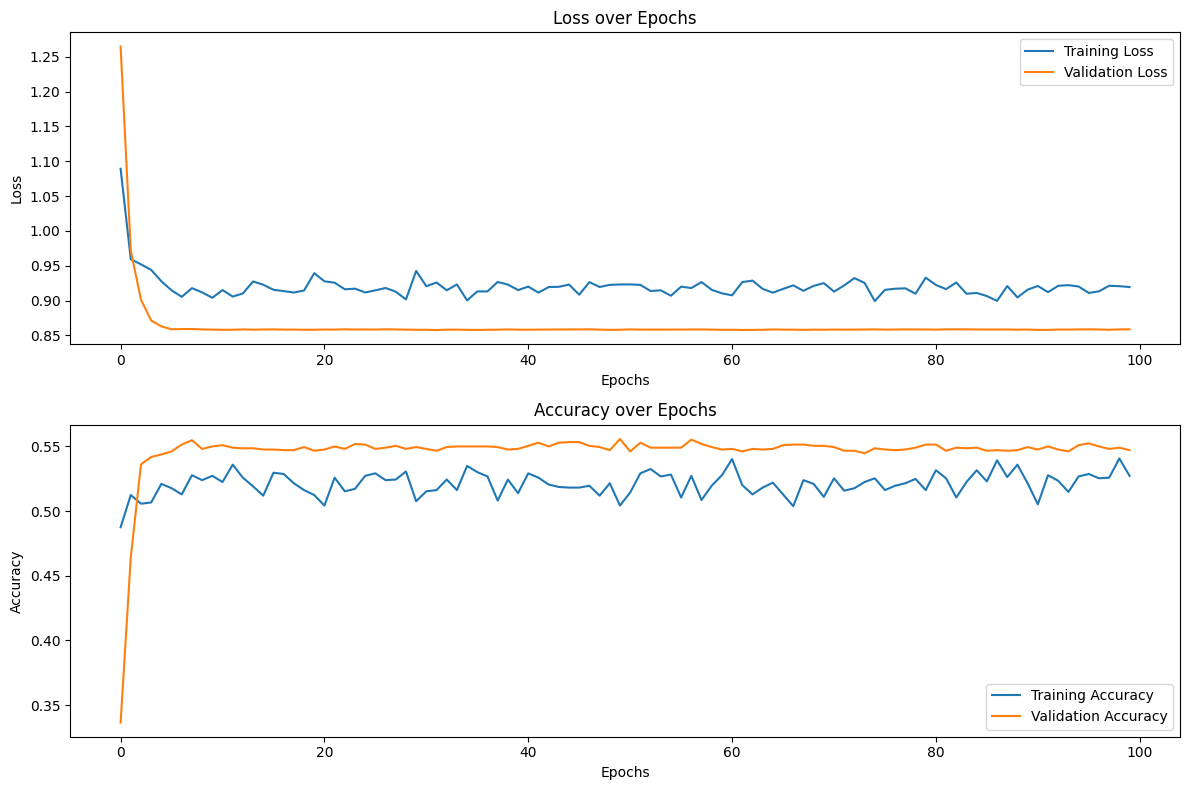

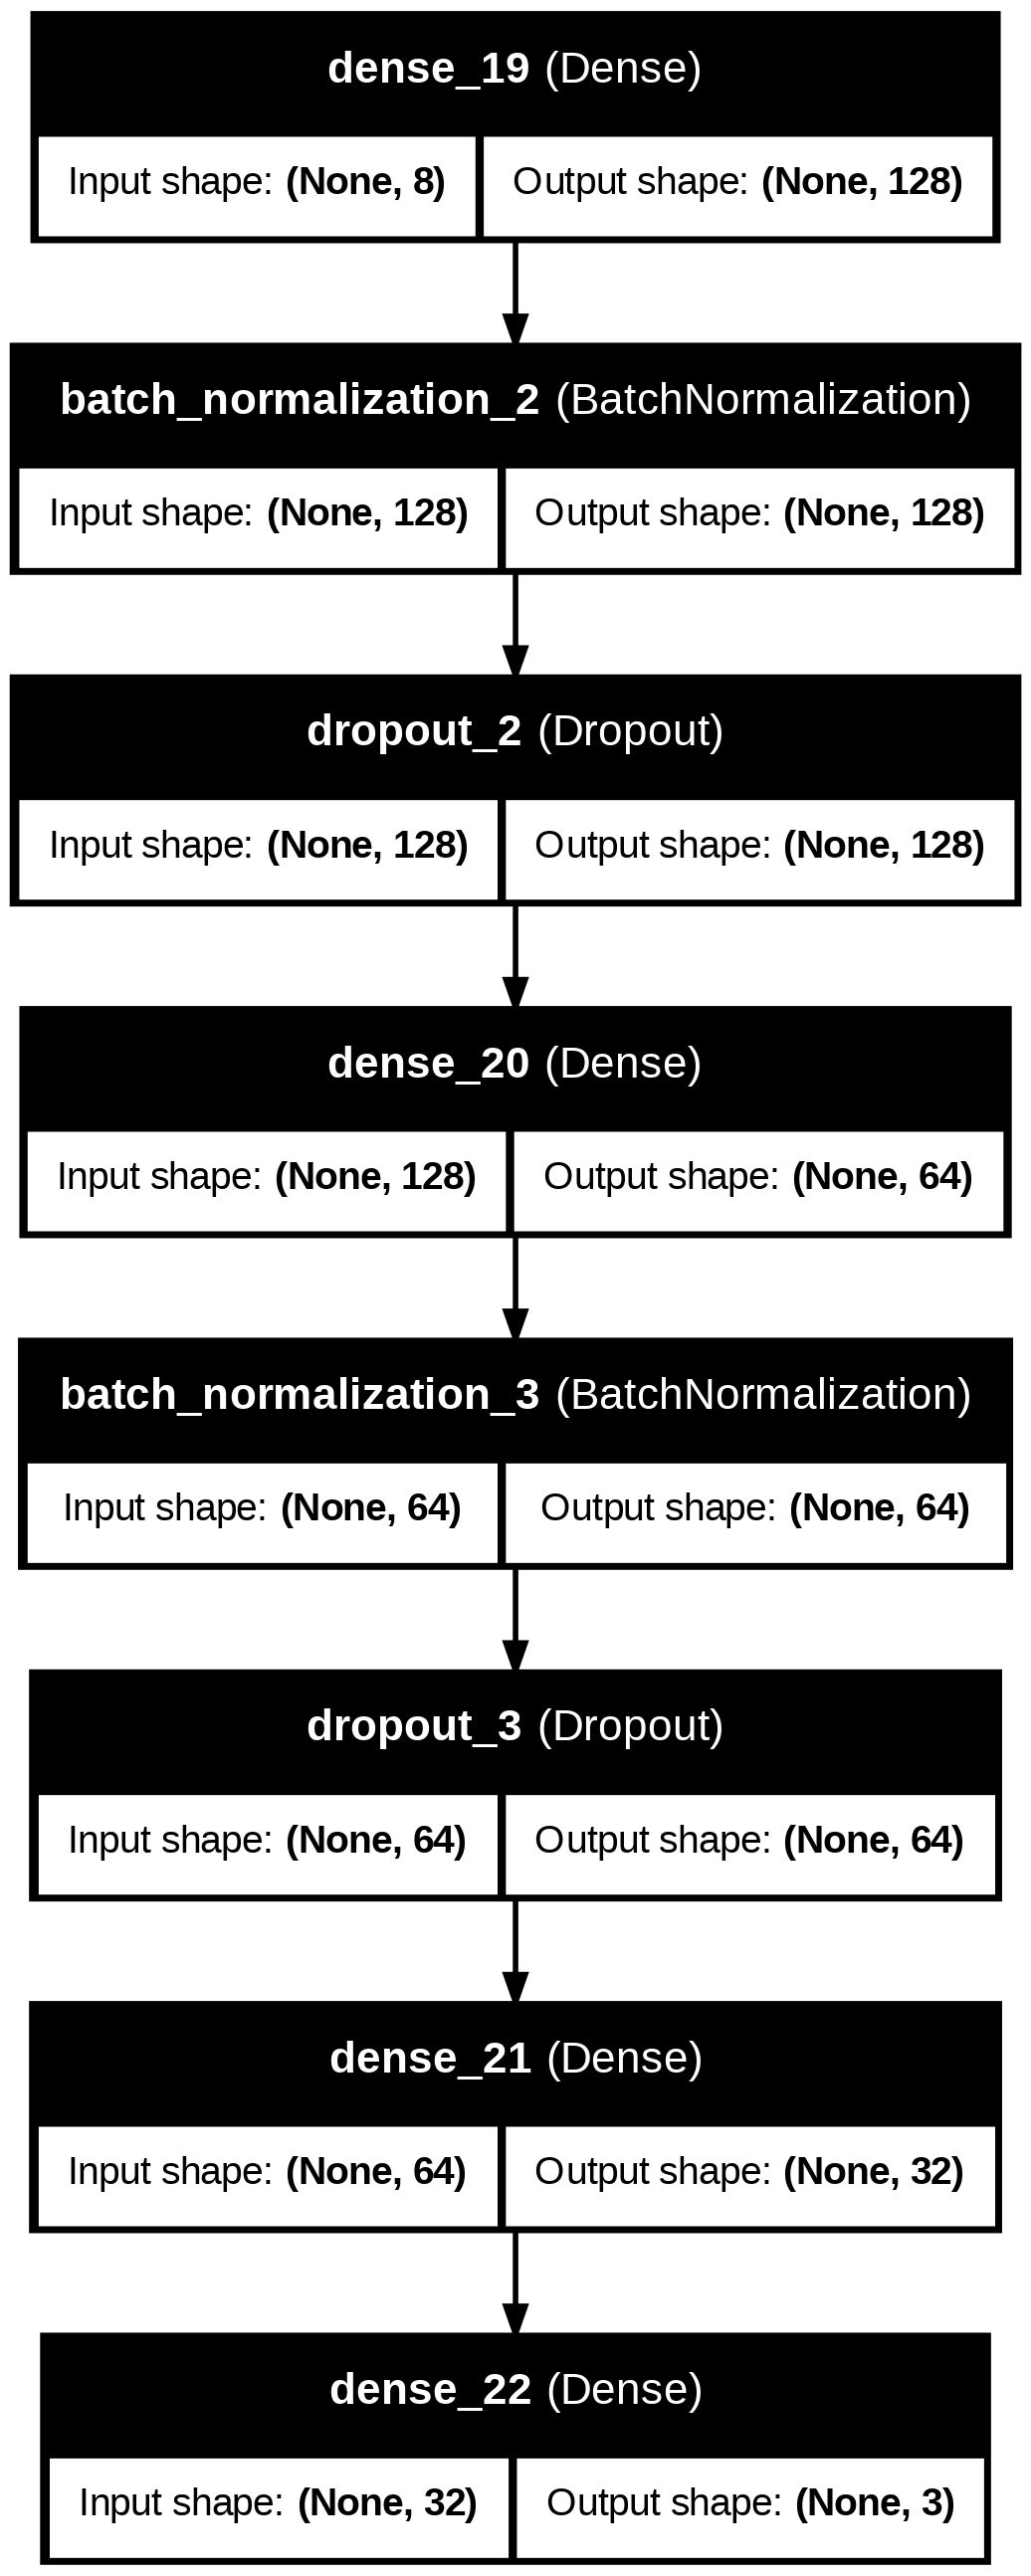

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


#https://blog.finxter.com/5-best-ways-to-plot-your-keras-model-in-python/
#https://keras.io/guides/sequential_model/
#https://stackoverflow.com/questions/72761152/how-to-use-plot-model-to-convert-a-model-as-png
#https://datascience.stackexchange.com/questions/26671/how-to-use-plot-model-in-keras


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
                'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=column_names)

data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
X = data.drop('Sex', axis=1).values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

def scheduler(epoch, lr):
    return lr * np.exp(-0.1 * epoch)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(scheduler)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded), callbacks=[lr_scheduler])

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('abalone-c.png')
plt.show()

plot_model(model, to_file='abalone-db.png', show_shapes=True, show_layer_names=True)
plot_model(model, to_file='abalone-dc.png', show_shapes=True, show_layer_names=True)


#ML playlist O'Reilly:
#Python Machine Learning Bootcamp, Maximilian Schallwig
#Machine Learning – Modern Computer Vision & Generative AI, Lazy Programmer
#Discover Data Science with Python Essentials: Data Acquisition and Visualization with Machine Learning, Srishti Puri
#Python Fundamentals with Paul Deitel, Paul J. Deitel
#Deep Learning with TensorFlow, Keras, and PyTorch, Jon Krohn
#Machine Learning with scikit-learn LiveLessons, David Mertz
#AI and Machine Learning for Coders, Laurence Moroney
#Machine Learning for Absolute Beginners - Level 2, Idan Gabrieli
#Mastering Machine Learning Algorithms using Python, Manas Dasgupta
#Projects in Machine Learning: From Beginner to Professional, Eduonix Learning Solutions
